<a href="https://colab.research.google.com/github/Trading-com-Dados/desenvolvimento_interno/blob/main/UPDATE_20220125_Introducao_Backtesting_Trading_Strategies_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **BACKTESTING: Definindo estratégias de trading com Python** 
---
#### *Disclaimer:*
#### Este código foi elaborado para fins exclusivamente educacionais. O conteúdo aqui apresentado visa fornecer informações complementares para auxiliar o investidor na tomada de suas próprias decisões de investimento. Reforçando, nenhum tópico aqui abordado constitui qualquer tipo de indicação/oferta/solicitação de compra/venda de qualquer produto.
---



# **1. Bibliotecas utilizadas**

In [ ]:
!pip install numpy pandas
!pip install matplotlib plotly
!pip install yfinance
!pip install ta
!pip install backtrader

     |████████████████████████████████| 63 kB 1.2 MB/s 
     |████████████████████████████████| 6.4 MB 11.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
  Created wheel for ta: filename=ta-0.9.0-py3-none-any.whl size=28908 sha256=e6eed132206f24f35e456fe6615fc831a1545a611dd1dc937374d2b33b8ff388
  Stored in directory: /root/.cache/pip/wheels/72/78/64/cc1c01506a1010a9

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime
import time
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib
from plotly.subplots import make_subplots
import yfinance as yf
import ta
import backtrader as bt
%matplotlib inline

# **2. Revisando o conceito de *Classes* e *Métodos***

## 2.1. Python: orientação à objetos

##### Variáveis e funções mais básicas

In [ ]:
ativo = 'PETR4'
setor = 'Combustíveis'
ohlc = [32.35,33.17,31.55,31.93]

print(ativo,"pertence ao setor de",setor)
print(type(ohlc))
media = sum(ohlc)/len(ohlc)
media

PETR4 pertence ao setor de Combustíveis
<class 'list'>


32.25

## 2.2. Classes: armazenar dados, funções e até coleções de métodos em um único objeto

### 2.2.1. Criar uma classe que define um ativo
\__init__  ->  permite criar a funcionalidade inicial da classe <p>
self -> definir as propriedades e métodos de uma instância

In [ ]:
class Ativo:
    def __init__(self,ticker,setor,ohlc):
        self.ticker = str(ticker)
        self.setor = str(setor)
        self.ohlc = list(ohlc)
    pass

In [ ]:
ativo1 = Ativo('PETR4','Combustíveis',[32.35,33.17,31.55,31.93])
ativo1

In [ ]:
ativo1.ticker

'PETR4'

In [ ]:
ativo1.ohlc[3]

31.93

In [ ]:
ativo2 = Ativo('ITUB4','Financeiro',[25.32,27.01,25.18,26.77])
ativo3 = Ativo('VALE3','Mineração',[80.87,82.55,80.76,82.40])
ativo2.setor == ativo3.setor

False

### 2.2.2. Criar uma classe com métodos
Dica: Ao trabalhar com classes, as 'cores no código' ajudam muito

In [ ]:
class Ativo:
    def __init__(self,ticker,setor,ohlc):
        self.ticker = str(ticker)
        self.setor = str(setor)
        self.ohlc = list(ohlc)
    
    def Amplitude(self):
        print(round((self.ohlc[1]-self.ohlc[2]),2))
    
    def Tipo(self):
        if self.ticker[-1] == '3':
            print(self.ticker,'é uma ação é do tipo ORDINÁRIA')
        elif self.ticker[-1] == '4':
            print(self.ticker,'é uma ação é do tipo PREFERENCIAL')
        elif self.ticker[-1] == '1':
            print(self.ticker,'é uma ação é do tipo UNIT')
        else:
            print('Não tenho certeza, melhor consultar o site da B3')
    
    def Resultado(self):
        resultado = (self.ohlc[3]-self.ohlc[0])
        if resultado == 0:
          print(self.ticker,'fechou estável')
        elif resultado > 0:
          print(self.ticker,'fechou em alta')
        elif resultado < 0:
          print(self.ticker,'fechou em baixa')

    def Fech_prox_max_min(self):
        media_max_min = np.mean([self.ohlc[1],self.ohlc[2]])
        if self.ohlc[3] > media_max_min:
            print(self.ticker,'parece estar em tendencia de alta')
        else:
            print(self.ticker,'parece estar em tendencia de baixa')

    pass

In [ ]:
ativo1 = Ativo('PETR4','Combustíveis',[32.35,33.17,31.55,31.93])
ativo2 = Ativo('ITUB4','Financeiro',[25.32,27.01,25.18,26.77])
ativo3 = Ativo('VALE3','Mineração',[80.87,82.55,80.76,82.40])
ativo4 = Ativo('BPAC11','Financeiro',[24.17,24.77,23.70,23.89])

In [ ]:
ativo1.Amplitude()


1.62


In [ ]:
Ativo.Amplitude(ativo3)

1.79


In [ ]:
ativo4.Tipo()

BPAC11 é uma ação é do tipo UNIT


In [ ]:
ativo2.setor == ativo4.setor

True

In [ ]:
ativo2.Resultado()

ITUB4 fechou em alta


In [ ]:
Ativo.Fech_prox_max_min(ativo3)

VALE3 parece estar em tendencia de alta


In [ ]:
ativo5 = Ativo('WEGE3','Bens_Industriais',[32.46,33.84,31.18,32.12])
Ativo.Resultado(ativo5)

WEGE3 fechou em baixa


# **3. Entendendo o funcionamento do "*Cérebro Backtrader*"**

## 3.1. Um pouco mais de Python:

### 3.1.1. *Expressions, quotations ...*

In [ ]:
razao_ativos = ativo3.ohlc[3]/ativo1.ohlc[3]
print(razao_ativos)
print('Com uma ação de',ativo3.ticker,'consigo comprar',razao_ativos,'ações de',ativo1.ticker)

2.580645161290323
Com uma ação de VALE3 consigo comprar 2.580645161290323 ações de PETR4


In [ ]:
print('Com uma ação de',ativo3.ticker,'consigo comprar %.1f ações de' % razao_ativos, ativo1.ticker)

Com uma ação de VALE3 consigo comprar 2.6 ações de PETR4


In [ ]:
print('Com uma ação de',f'{ativo3.ticker.lower()}','consigo comprar %.1f ações de' % razao_ativos,ativo1.ticker)

Com uma ação de vale3 consigo comprar 2.6 ações de PETR4


In [ ]:
data_cotacao = '2022-01-03'
print('Na data de',f'{pd.to_datetime(data_cotacao).strftime("%d/%m/%Y")}','\b, uma ação de', 
f'{ativo3.ticker}','equivale a aproximadamente %.1f ações de' % razao_ativos,ativo1.ticker)

Na data de 03/01/2022 , uma ação de VALE3 equivale a aproximadamente 2.6 ações de PETR4


In [ ]:
type(ativo5.ohlc[3])

float

### 3.1.2. Herança entre classes

In [ ]:
class Ativo_num:
    def __init__(self,ticker,setor,ohlc):
        self.ticker = str(ticker)
        self.setor = str(setor)
        self.ohlc = list(ohlc)
    
    def Amplitude(self):
        print(round((self.ohlc[1]-self.ohlc[2]),2))
    
    def Tipo(self):
        if self.ticker[-1] == '3':
            print(self.ticker,'é uma ação é do tipo ORDINÁRIA')
        elif self.ticker[-1] == '4':
            print(self.ticker,'é uma ação é do tipo PREFERENCIAL')
        elif self.ticker[-1] == '1':
            print(self.ticker,'é uma ação é do tipo UNIT')
        else:
            print('Não tenho certeza, melhor consultar o site da B3')

    def Resultado(self):
        resultado = (self.ohlc[3]-self.ohlc[0])
        if resultado == 0:
          print(self.ticker,'fechou estável')
        elif resultado > 0:
          print(self.ticker,'fechou em alta')
        elif resultado < 0:
          print(self.ticker,'fechou em baixa')

    def Fech_prox_max_min(self):
        media_max_min = np.mean([self.ohlc[1],self.ohlc[2]])
        if self.ohlc[3] > media_max_min:
            print(self.ticker,'parece estar em tendencia de alta')
        else:
            print(self.ticker,'parece estar em tendencia de baixa')
            
    def Amplitude_num(self):
        return (round((self.ohlc[1]-self.ohlc[2]),2))
    
    def Resultado_num(self):
        self.resultado_num = (self.ohlc[3]-self.ohlc[0])
        return round(self.resultado_num,2)
        
pass

In [ ]:
x = ativo5.Amplitude()
type(x)

2.66


NoneType

In [ ]:
## Obs.: Output daria erro já que ativo5 foi criado usando classe Ativo ao invés de Ativo_num
## ativo5.Amplitude_num()

In [ ]:
ativo1 = Ativo_num('PETR4','Combustíveis',[32.35,33.17,31.55,31.93])
ativo2 = Ativo_num('ITUB4','Financeiro',[25.32,27.01,25.18,26.77])
ativo3 = Ativo_num('VALE3','Mineração',[80.87,82.55,80.76,82.40])
ativo4 = Ativo_num('BPAC11','Financeiro',[24.17,24.77,23.70,23.89])
ativo5 = Ativo_num('WEGE3','Bens_Industriais',[32.46,33.84,31.18,32.12])

In [ ]:
y = ativo5.Amplitude_num()
type(y)

float

In [ ]:
class ETFs(Ativo_num):
    def __init__(self,ticker,ohlc):
        self.ticker = str(ticker)
        self.ohlc = list(ohlc)

In [ ]:
IBOV = ETFs('^BVSP',[113428,114269,112815,113879])
IBOV.ticker

'^BVSP'

In [ ]:
IBOV.ohlc[3]-IBOV.ohlc[0]

451

In [ ]:
ativo1.Resultado_num()

-0.42

In [ ]:
IBOV.Resultado()

^BVSP fechou em alta


In [ ]:
IBOV.Tipo()

Não tenho certeza, melhor consultar o site da B3


## 3.2. Estrutura básica do "Cérebro"

In [ ]:
## Instanciar o cérebro
cerebro = bt.Cerebro()

print('Valor inicial da carteira: %.2f' % cerebro.broker.getvalue())

## Executar o backtesting
cerebro.run()

print('Valor final da carteira: %.2f' % cerebro.broker.getvalue())

Valor inicial da carteira: 10000.00
Valor final da carteira: 10000.00


In [ ]:
## Instanciar o cérebro
cerebro = bt.Cerebro()

## Carregar dados de cotações ohlc
# cerebro.adddata()

## Determinar a estratégia de trading
# cerebro.addstrategy()

## Estabelecer parâmetros do broker
cerebro.broker.setcash(20000)
cerebro.addsizer(bt.sizers.SizerFix, stake=10)

print('Valor inicial da carteira: %.2f' % cerebro.broker.getvalue())

## Executar o backtesting
cerebro.run()

print('Valor final da carteira: %.2f' % cerebro.broker.getvalue())

Valor inicial da carteira: 20000.00
Valor final da carteira: 20000.00


## 3.3. Importar dados cotações

OBSERVAÇÃO: A estrutura de um Data Feeds (nos exemplos abaixo = data) é diferente de um dataframe Pandas. Ex., se tentar rodar algo como `data.head()` ou `data.iloc[-1]['Close']` , você obterá erros.

No tópico 3.6. <u>*Estrutura de acesso aos dados no Backtrader (valores de cotacoes, indicadores e estrategias*</u>, após incluir uma estratégia de trading do código, trabalharemos o background por trás dos diferentes objetos no backtrader

### 3.3.1. Código usando Yahoo Finance para Data Feeds

In [ ]:
## Instanciar o cérebro
cerebro = bt.Cerebro()

## Importar os dados de cotações do Yahoo Finance
df_yf = yf.download('PETR4.SA', start='2021-01-01', end='2021-03-31', period = "1d")
data = bt.feeds.PandasData(dataname=df_yf, name='PETR4.SA')

## Estabelecer parâmetros do broker
cerebro.broker.setcash(10000)

print('Valor inicial da carteira: %.2f' % cerebro.broker.getvalue())

## Executar o backtesting
cerebro.run()

print('Valor final da carteira: %.2f' % cerebro.broker.getvalue())

[*********************100%***********************]  1 of 1 completed
Valor inicial da carteira: 10000.00
Valor final da carteira: 10000.00


### 3.3.2. Código usando MetaTrader 5 ***(UNDER CONSTRUCTION)***

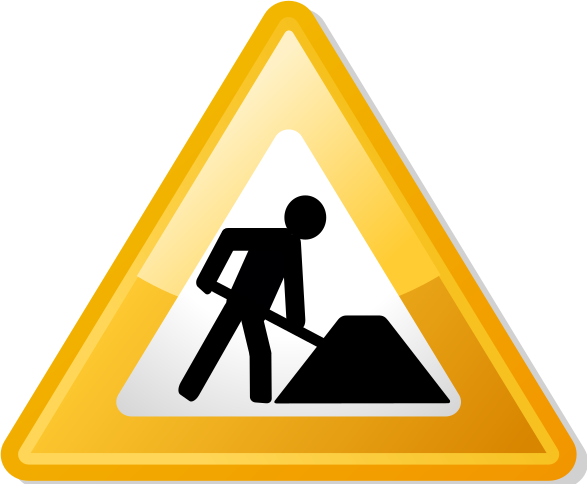

In [ ]:
import IPython
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/Under_construction_icon-yellow.svg/587px-Under_construction_icon-yellow.svg.png'
IPython.display.Image(url, width = 300)

## 3.4. Definir uma estratégia de execução

### 3.4.1. Estratégia de Execução 1: Imprimir o preço de fechamento do ativo

OBSERVAÇÃO: **Por enquanto**, não se preocupe muito em entender alguns objetos como `datas[0]` `datas[0].datetime.date(0)` (você verá que representam preço de fechamento e data do momento atual, respectivamente). Eles só serão criados ao rodar executar o cérebro Backtrader `cerebro.run()`

No tópico 3.6. <u>*Estrutura de acesso aos dados no Backtrader (valores de cotacoes, indicadores e estrategias*</u>, após incluir uma estratégia de trading no código, você provavelmente encontrará suas respostas.

(Nesse momento...) <p>
Leitor: Por que você não explica isso logo? <p>
Resposta: Por que é um paradoxo! 🙄

In [ ]:
class PrintFechamento(bt.Strategy):

  ## Criar __init__ com todas as variáveis que pretende usar na estratégia. Neste exemplo, o preço de fechamento do período atual (indexação dinâmica)
  def __init__(self):
    self.dataclose = self.datas[0]
  
  ## Criar uma função de registro (caso queira imprimir na tela algum parâmetro)
  def registro(self, txt, dt=None):
    dt = self.datas[0].datetime.date(0)
    print(f'Na data {dt}, {txt}')
  
  ## Criar uma "função de execução" que seguirá a série temporal dos dados. Nesse caso, ele representa o "txt" da função registro
  def next(self):
    self.registro('o preço de fechamento foi: %.2f' % self.dataclose[0])

In [ ]:
## Instanciar o cérebro
cerebro = bt.Cerebro()

## Importar os dados de cotações
cerebro.adddata(data)

## Determinar a estratégia de execução
cerebro.addstrategy(PrintFechamento)

## Estabelecer parâmetros do broker
cerebro.broker.setcash(10000)
print('Valor inicial da carteira: %.2f' % cerebro.broker.getvalue())

## Executar o backtesting
cerebro.run()
print('Valor final da carteira: %.2f' % cerebro.broker.getvalue())

Valor inicial da carteira: 10000.00
Na data 2021-01-04, o preço de fechamento foi: 28.91
Na data 2021-01-05, o preço de fechamento foi: 30.04
Na data 2021-01-06, o preço de fechamento foi: 30.10
Na data 2021-01-07, o preço de fechamento foi: 31.00
Na data 2021-01-08, o preço de fechamento foi: 31.12
Na data 2021-01-11, o preço de fechamento foi: 30.86
Na data 2021-01-12, o preço de fechamento foi: 30.63
Na data 2021-01-13, o preço de fechamento foi: 29.15
Na data 2021-01-14, o preço de fechamento foi: 29.45
Na data 2021-01-15, o preço de fechamento foi: 28.12
Na data 2021-01-18, o preço de fechamento foi: 28.07
Na data 2021-01-19, o preço de fechamento foi: 28.69
Na data 2021-01-20, o preço de fechamento foi: 28.21
Na data 2021-01-21, o preço de fechamento foi: 27.55
Na data 2021-01-22, o preço de fechamento foi: 27.09
Na data 2021-01-26, o preço de fechamento foi: 27.00
Na data 2021-01-27, o preço de fechamento foi: 27.40
Na data 2021-01-28, o preço de fechamento foi: 27.76
Na data 20

In [ ]:
## Para conferirmos se o cérebro está funcionando bem
df_yf.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-24,23.190001,23.540001,22.820000,22.820000,18.547915,63338300
2021-03-25,22.700001,23.299999,22.160000,23.200001,18.856775,79214500
2021-03-26,23.480000,23.879999,23.110001,23.459999,19.068100,60918600
2021-03-29,23.340000,23.830000,23.280001,23.830000,19.368834,50099700
2021-03-30,23.639999,23.990000,23.570000,23.830000,19.368834,41959100


### 3.4.2. Estratégia de Execução 2: Imprimir duas médias móveis e avaliar qual delas é maior

In [ ]:
class Medias_Moveis(bt.Strategy):

  params = (('short',8), ('long',20))

  ## Criar __init__ com todas os parâmetros que pretende usar. A ordem é importante.
  def __init__(self):
    sma_short = bt.indicators.MovingAverageSimple(self.datas[0],period=self.params.short)
    sma_long = bt.indicators.MovingAverageSimple(self.datas[0],period=self.params.long)
    self.crossover = bt.indicators.CrossOver(sma_short,sma_long)
    self.sma_short = bt.indicators.MovingAverageSimple(self.datas[0],period=self.params.short)
    self.sma_long = bt.indicators.MovingAverageSimple(self.datas[0],period=self.params.long)
    self.Diff_MM = (sma_short-sma_long)

  def log(self, txt, dt=None):
    dt = self.datas[0].datetime.date(0)
    print(f'{dt}: {txt}')

  ## Criar uma "função de execução" que seguirá a série temporal dos dados
  def next(self):
    self.log('MM curta (%.0fp) = R$ %.2f || MM longa (%.0fp) = R$ %.2f || Posição crossover =  %.0f || Diff MM = %.2f'  % ((self.params.short),(self.sma_short[0]),(self.params.long),(self.sma_long[0]),(self.crossover[0]),(self.Diff_MM[0])))

In [ ]:
## Instanciar o cérebro
cerebro = bt.Cerebro()

## Importar os dados de cotações
cerebro.adddata(data)

## Determinar a estratégia de execução
cerebro.addstrategy(Medias_Moveis)

## Estabelecer parâmetros do broker
cerebro.broker.setcash(10000)
print('Valor inicial da carteira: %.2f' % cerebro.broker.getvalue())

## Executar o backtesting
cerebro.run()

print('Valor final da carteira: %.2f' % cerebro.broker.getvalue())

Valor inicial da carteira: 10000.00
2021-02-02: MM curta (8p) = R$ 27.46 || MM longa (20p) = R$ 28.76 || Posição crossover =  0 || Diff MM = -1.30
2021-02-03: MM curta (8p) = R$ 27.63 || MM longa (20p) = R$ 28.70 || Posição crossover =  0 || Diff MM = -1.07
2021-02-04: MM curta (8p) = R$ 27.85 || MM longa (20p) = R$ 28.64 || Posição crossover =  0 || Diff MM = -0.79
2021-02-05: MM curta (8p) = R$ 28.08 || MM longa (20p) = R$ 28.53 || Posição crossover =  0 || Diff MM = -0.45
2021-02-08: MM curta (8p) = R$ 28.17 || MM longa (20p) = R$ 28.38 || Posição crossover =  0 || Diff MM = -0.21
2021-02-09: MM curta (8p) = R$ 28.14 || MM longa (20p) = R$ 28.21 || Posição crossover =  0 || Diff MM = -0.07
2021-02-10: MM curta (8p) = R$ 28.28 || MM longa (20p) = R$ 28.07 || Posição crossover =  1 || Diff MM = 0.21
2021-02-11: MM curta (8p) = R$ 28.35 || MM longa (20p) = R$ 28.02 || Posição crossover =  0 || Diff MM = 0.33
2021-02-12: MM curta (8p) = R$ 28.32 || MM longa (20p) = R$ 27.97 || Posição c

In [ ]:
## Mais uma vez, fazendo o backtest do Backtrader...
sma_long = ta.trend.SMAIndicator(df_yf['Close'], window=20)
sma_short = ta.trend.SMAIndicator(df_yf['Close'], window=8)
df_yf['SMA_long'] = sma_long.sma_indicator()
df_yf['SMA_short'] = sma_short.sma_indicator()
df_yf['Diff_MM_short_long'] = df_yf['SMA_short'] - df_yf['SMA_long']
df_yf.tail()

,Open,High,Low,Close,Adj Close,Volume,SMA_long,SMA_short,Diff_MM_short_long
Date,,,,,,,,,
2021-03-24,23.190001,23.540001,22.820000,22.820000,18.547915,63338300,22.7050,23.42375,0.71875
2021-03-25,22.700001,23.299999,22.160000,23.200001,18.856775,79214500,22.7055,23.36750,0.66200
2021-03-26,23.480000,23.879999,23.110001,23.459999,19.068100,60918600,22.7665,23.39000,0.62350
2021-03-29,23.340000,23.830000,23.280001,23.830000,19.368834,50099700,22.8580,23.35875,0.50075
2021-03-30,23.639999,23.990000,23.570000,23.830000,19.368834,41959100,22.9500,23.43250,0.48250


## 3.5. Definir uma estratégia de trading

### 3.5.1. Incorporando ordens de compra/venda e visualização gráfica do resultado

In [ ]:
class Cruzamento_Medias_Moveis(bt.Strategy):

    params = {'short':8,'long':20}

    def __init__(self):
        sma_short = bt.indicators.MovingAverageSimple(self.datas[0],period=self.params.short)
        sma_long = bt.indicators.MovingAverageSimple(self.datas[0],period=self.params.long)
        
        self.crossover = bt.indicators.CrossOver(sma_short,sma_long)
    
    def next(self):
        ## Quando houver um cruzamento MM curta > MM longa: comprar. Qd for cruzam. para baixo: venda
        if self.crossover > 0:
          self.buy()
        elif self.crossover < 0:
          self.sell()


In [ ]:
## Instanciar o cérebro
cerebro = bt.Cerebro()

## Importar os dados de cotações
cerebro.adddata(data)

## Determinar a estratégia de execução
cerebro.addstrategy(Cruzamento_Medias_Moveis)

## Estabelecer parâmetros do broker
cerebro.broker.setcash(10000)

print('Valor inicial da carteira: %.2f' % cerebro.broker.getvalue())

## Executar o backtesting
cerebro.run()

print('Valor final da carteira: %.2f' % cerebro.broker.getvalue())

Valor inicial da carteira: 10000.00
Valor final da carteira: 9995.47


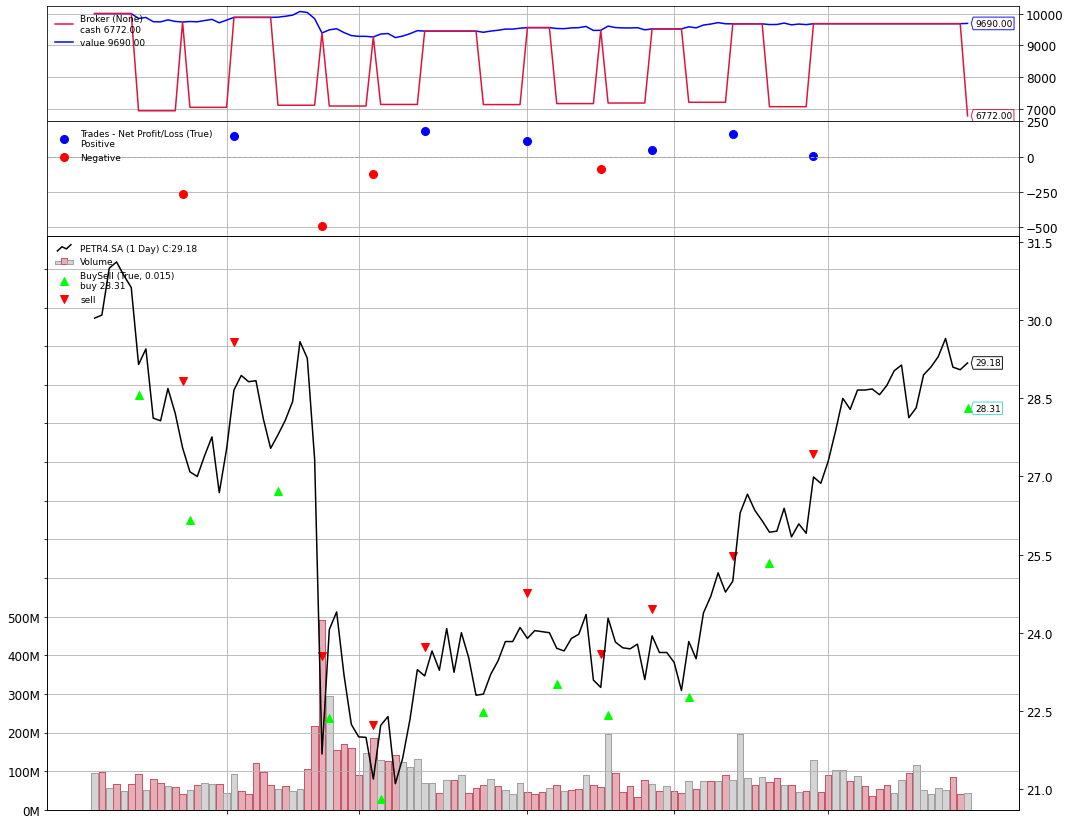

In [ ]:
plt.rcParams['figure.figsize'] = [15, 12]
plt.rcParams.update({'font.size': 12})
cerebro.plot(iplot = False);

In [ ]:
cerebro = bt.Cerebro()
cerebro.adddata(data)
cerebro.addstrategy(Cruzamento_Medias_Moveis)

## Estabelecer parâmetros do broker
cerebro.broker.setcash(10000)
cerebro.addsizer(bt.sizers.SizerFix, stake=100)

print('Valor inicial da carteira: %.2f' % cerebro.broker.getvalue())
cerebro.run()
print('Valor final da carteira: %.2f' % cerebro.broker.getvalue())

Valor inicial da carteira: 10000.00
Valor final da carteira: 9547.00


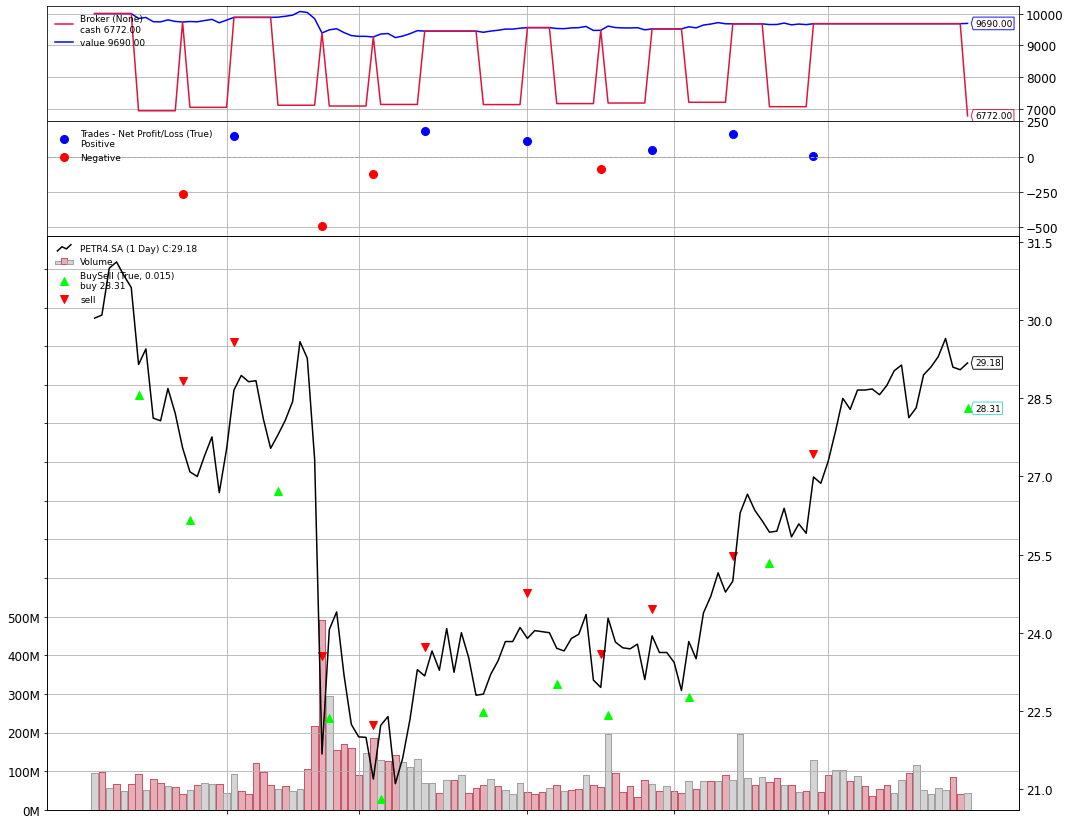

In [ ]:
plt.rcParams['figure.figsize'] = [15, 12]
plt.rcParams.update({'font.size': 12})
cerebro.plot(iplot = False);

Até agora tudo parece OK, mas e se eu aumento a mão de entrada 5000 ações? E quando o número de operações aumentarem?

In [ ]:
cerebro = bt.Cerebro()
cerebro.adddata(data)
cerebro.addstrategy(Cruzamento_Medias_Moveis)

## Estabelecer parâmetros do broker
cerebro.broker.setcash(10000)
cerebro.addsizer(bt.sizers.SizerFix, stake=5000)

print('Valor inicial da carteira: %.2f' % cerebro.broker.getvalue())
cerebro.run()
print('Valor final da carteira: %.2f' % cerebro.broker.getvalue())

Valor inicial da carteira: 10000.00
Valor final da carteira: 8899.99


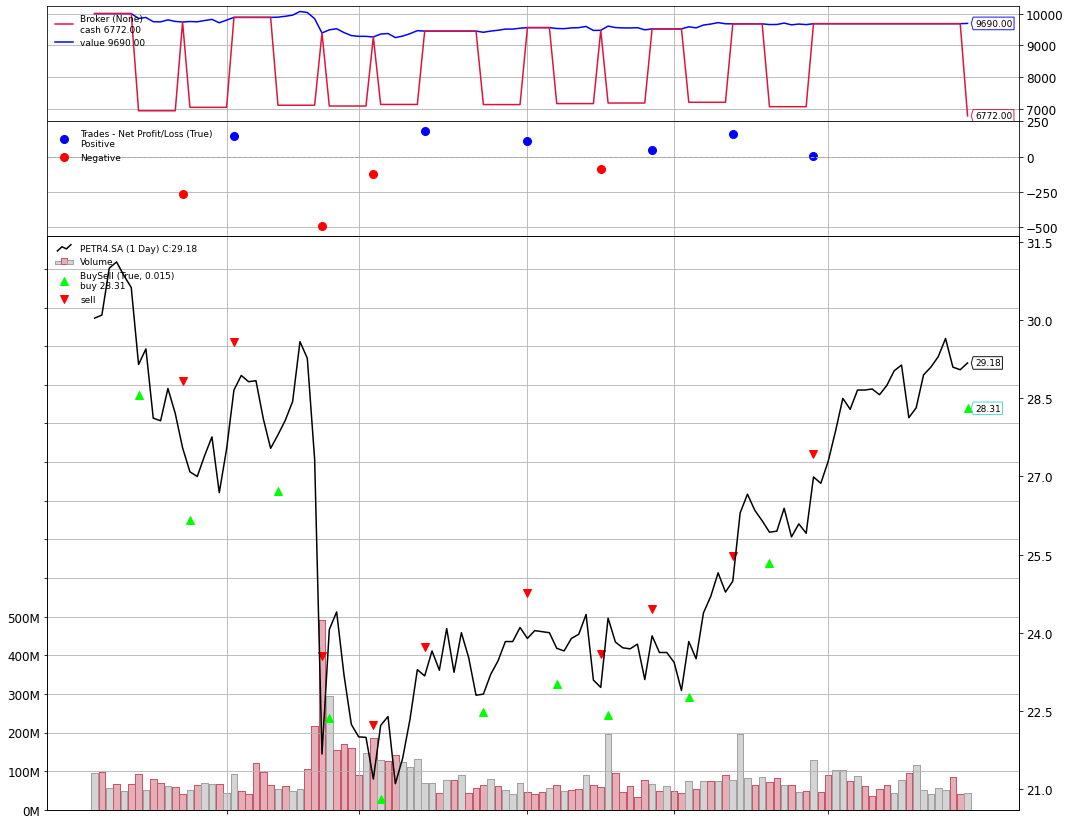

[[<Figure size 1080x864 with 4 Axes>]]

In [ ]:
plt.rcParams['figure.figsize'] = [15, 12]
plt.rcParams.update({'font.size': 12})
cerebro.plot(iplot = False)

### 3.5.2. Verificação de parâmetros importantes como status de ordem, position, custos operações (corretagem, emolumentos...)

Vamos aumentar a cobertura temporal para possibilitar mais trades

In [ ]:
## Importar os dados de cotações do Yahoo Finance
df_yf = yf.download('PETR4.SA', start='2021-01-05', end='2021-06-30', period = "1d")
data = bt.feeds.PandasData(dataname=df_yf, name='PETR4.SA')

[*********************100%***********************]  1 of 1 completed


In [ ]:
class Cruzamento_Preco_MMA(bt.Strategy):
  
  params = (('MMA',9),)
  
  def __init__(self):
    sma = bt.indicators.MovingAverageSimple(self.datas[0],period=self.params.MMA)
    price = self.datas[0]
    self.crossover = bt.indicators.CrossOver(price,sma)
    self.sma = sma
    self.price = price
  
  def log(self, txt, dt=None):
    dt = self.datas[0].datetime.date(0)
    print(f'{dt}: {txt}')

  def next(self):
    if self.crossover > 0:
      self.log('|| MMMA %.0fp = R$ %.2f || Close = R$ %.2f || Posição crossover = %.0f || Hoje, o ativo fechou ACIMA da MMA, assim, comprar a mercado (BuyAtMarket) na abertura de amanha' % ((self.params.MMA),(self.sma[0]),(self.price[0]),(self.crossover[0])))
      self.buy()
    elif self.crossover < 0:
      self.log('|| MMMA %.0fp = R$ %.2f || Close = R$ %.2f || Posição crossover = %.0f || Hoje, o ativo fechou ABAIXO da MMA, assim, vender a mercado (SellAtMarket) na abertura de amanha' % ((self.params.MMA),(self.sma[0]),(self.price[0]),(self.crossover[0])))
      self.sell()
    else:
      self.log('|| MMMA %.0fp = R$ %.2f || Close = R$ %.2f || Posição crossover = %.0f || Hoje não operei' % ((self.params.MMA),(self.sma[0]),(self.price[0]),(self.crossover[0])))

In [ ]:
cerebro = bt.Cerebro()
cerebro.adddata(data)
cerebro.addstrategy(Cruzamento_Preco_MMA)

## Estabelecer parâmetros do broker
cerebro.broker.setcash(10000)
cerebro.addsizer(bt.sizers.SizerFix, stake=100)

print('Valor inicial da carteira: %.2f' % cerebro.broker.getvalue())
cerebro.run()
print('Valor final da carteira: %.2f' % cerebro.broker.getvalue())

Valor inicial da carteira: 10000.00
2021-01-18: || MMMA 9p = R$ 29.83 || Close = R$ 28.07 || Posição crossover = 0 || Hoje não operei
2021-01-19: || MMMA 9p = R$ 29.68 || Close = R$ 28.69 || Posição crossover = 0 || Hoje não operei
2021-01-20: || MMMA 9p = R$ 29.37 || Close = R$ 28.21 || Posição crossover = 0 || Hoje não operei
2021-01-21: || MMMA 9p = R$ 28.97 || Close = R$ 27.55 || Posição crossover = 0 || Hoje não operei
2021-01-22: || MMMA 9p = R$ 28.55 || Close = R$ 27.09 || Posição crossover = 0 || Hoje não operei
2021-01-26: || MMMA 9p = R$ 28.15 || Close = R$ 27.00 || Posição crossover = 0 || Hoje não operei
2021-01-27: || MMMA 9p = R$ 27.95 || Close = R$ 27.40 || Posição crossover = 0 || Hoje não operei
2021-01-28: || MMMA 9p = R$ 27.77 || Close = R$ 27.76 || Posição crossover = 0 || Hoje não operei
2021-01-29: || MMMA 9p = R$ 27.61 || Close = R$ 26.69 || Posição crossover = 0 || Hoje não operei
2021-02-01: || MMMA 9p = R$ 27.55 || Close = R$ 27.53 || Posição crossover = 0 || 

In [ ]:
MMA9p = ta.trend.SMAIndicator(df_yf['Close'], window=9)
df_yf['MMA9p'] = MMA9p.sma_indicator()
df_yf['Cl>MMA9'] = df_yf['Close'] > df_yf['MMA9p']
df_yf.head(25)

,Open,High,Low,Close,Adj Close,Volume,MMA9p,Cl>MMA9
Date,,,,,,,,
2021-01-05,28.900000,30.180000,28.240000,30.040001,24.416273,95181100,NaN,False
2021-01-06,30.160000,30.900000,30.049999,30.100000,24.465040,96562500,NaN,False
2021-01-07,30.340000,31.150000,30.340000,31.000000,25.196552,56171300,NaN,False
2021-01-08,31.459999,31.760000,30.350000,31.120001,25.294088,67136300,NaN,False
2021-01-11,30.610001,31.059999,30.400000,30.860001,25.082762,48744700,NaN,False
2021-01-12,31.120001,31.559999,30.629999,30.629999,24.895821,65691900,NaN,False
2021-01-13,30.680000,30.860001,29.000000,29.150000,23.692888,93826600,NaN,False
2021-01-14,29.170000,29.670000,28.719999,29.450001,23.936726,50745400,NaN,False
2021-01-15,29.049999,29.080000,28.030001,28.120001,22.855711,80673300,30.052223,False


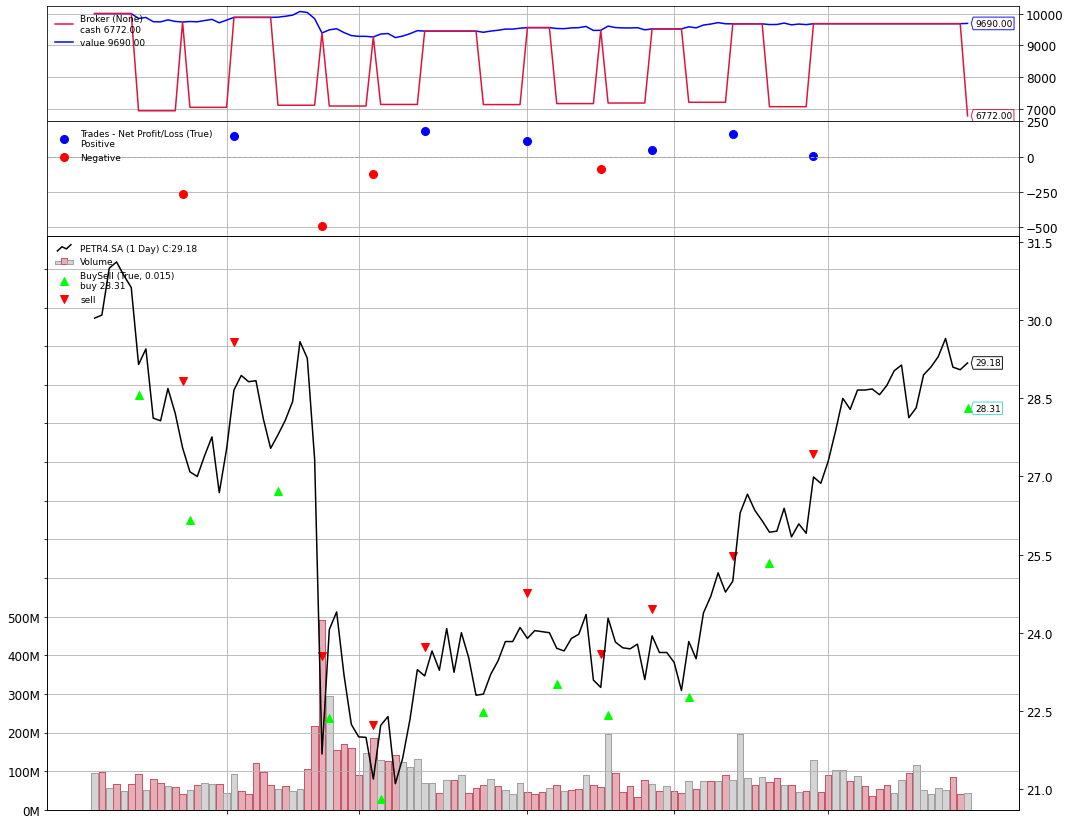

In [ ]:
plt.rcParams['figure.figsize'] = [15, 12]
plt.rcParams.update({'font.size': 12})
cerebro.plot(iplot = False);

Setups com muitas entradas podem ser complicados dependendo das taxas. Incluindo as taxas na avaliação

In [ ]:
cerebro = bt.Cerebro()
cerebro.adddata(data)
cerebro.addstrategy(Cruzamento_Preco_MMA)

## Estabelecer parâmetros do broker
cerebro.broker.setcash(10000)
cerebro.addsizer(bt.sizers.SizerFix, stake=100)

'''
Taxas:
MARGIN (default None)= cash necessário para operações envolvendo mercado futuro
COMISSION (default 0.0): 
Se MARGIN = FALSE: *commission* representa uma porcentagem do volume financeiro de negociação (price * size) (ex., emolumentos de ações e taxas de liquidação)
Se MARGIN = qq valor ou None: *commission* é fixa por contrato (ex. corretagem). Lembrar q é compra/venda em cada operação fechada) 
MULT (default 1)= Fator de multiplicação aos lucros e perdas envolvendo mercados futuros (alavancagem)
'''
cerebro.broker.setcommission(commission=0.00025,margin=False,mult=1)

print('Valor inicial da carteira: %.2f' % cerebro.broker.getvalue())
cerebro.run()
print('Valor final da carteira: %.2f' % cerebro.broker.getvalue())

Valor inicial da carteira: 10000.00
2021-01-18: || MMMA 9p = R$ 29.83 || Close = R$ 28.07 || Posição crossover = 0 || Hoje não operei
2021-01-19: || MMMA 9p = R$ 29.68 || Close = R$ 28.69 || Posição crossover = 0 || Hoje não operei
2021-01-20: || MMMA 9p = R$ 29.37 || Close = R$ 28.21 || Posição crossover = 0 || Hoje não operei
2021-01-21: || MMMA 9p = R$ 28.97 || Close = R$ 27.55 || Posição crossover = 0 || Hoje não operei
2021-01-22: || MMMA 9p = R$ 28.55 || Close = R$ 27.09 || Posição crossover = 0 || Hoje não operei
2021-01-26: || MMMA 9p = R$ 28.15 || Close = R$ 27.00 || Posição crossover = 0 || Hoje não operei
2021-01-27: || MMMA 9p = R$ 27.95 || Close = R$ 27.40 || Posição crossover = 0 || Hoje não operei
2021-01-28: || MMMA 9p = R$ 27.77 || Close = R$ 27.76 || Posição crossover = 0 || Hoje não operei
2021-01-29: || MMMA 9p = R$ 27.61 || Close = R$ 26.69 || Posição crossover = 0 || Hoje não operei
2021-02-01: || MMMA 9p = R$ 27.55 || Close = R$ 27.53 || Posição crossover = 0 || 

In [ ]:
class Tres_Corvos_Pretos(bt.Strategy):

    def __init__(self):
      self.dataclose = self.datas[0].close
      
    def log(self, txt, dt=None):
      dt = self.datas[0].datetime.date(0)
      print('%s, %s' % (dt.isoformat(), txt))

    def next(self):
      self.log('Close, %.2f' % (self.dataclose[0]))
        
      if self.dataclose[0] < self.dataclose[-1]:
        if self.dataclose[-1] < self.dataclose[-2]:
          self.buy()
          self.log('Hoje, vc observou um Three Black Crow, assim, fara uma compra do tipo "BuyAtMarket", nesse caso, na abertura do pregão de amanha')


In [ ]:
class TestStrategy(bt.Strategy):

    def log(self, txt, dt=None):
        dt = self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        self.dataclose = self.datas[0].close

        # Acompanhar as ordens pendentes
        self.order = None

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log('BUY EXECUTED, %.2f' % order.executed.price)
            elif order.issell():
                self.log('SELL EXECUTED, %.2f' % order.executed.price)

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        # Write down: no pending order
        self.order = None

    def next(self):
        
        #Registrar o valor de fechamento
        self.log('Close, %.2f' % self.dataclose[0])

        # Checar se alguma ordem está pendente. Se sim, não é possível enviar uma segunda ordem
        if self.order:
            return

        # Checar se estamos posicionados no ativo
        if not self.position:

            # Not yet ... we MIGHT BUY if ...
            if self.dataclose[0] < self.dataclose[-1]:
                    # current close less than previous close

                    if self.dataclose[-1] < self.dataclose[-2]:
                        # previous close less than the previous close

                        # BUY, BUY, BUY!!! (with default parameters)
                        self.log('BUY CREATE, %.2f' % self.dataclose[0])

                        # Keep track of the created order to avoid a 2nd order
                        self.order = self.buy()

        else:

            # Already in the market ... we might sell
            if len(self) >= (self.bar_executed + 5):
                # SELL, SELL, SELL!!! (with all possible default parameters)
                self.log('SELL CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.sell()

In [ ]:
cerebro = bt.Cerebro()
cerebro.adddata(data)
cerebro.addstrategy(TestStrategy)
cerebro.broker.setcash(10000)
cerebro.addsizer(bt.sizers.SizerFix, stake=100)

print('Valor inicial da carteira: %.2f' % cerebro.broker.getvalue())
cerebro.run()
print('Valor final da carteira: %.2f' % cerebro.broker.getvalue())

Valor inicial da carteira: 10000.00
2021-01-05, Close, 30.04
2021-01-06, Close, 30.10
2021-01-07, Close, 31.00
2021-01-08, Close, 31.12
2021-01-11, Close, 30.86
2021-01-12, Close, 30.63
2021-01-12, BUY CREATE, 30.63
2021-01-13, BUY EXECUTED, 30.68
2021-01-13, Close, 29.15
2021-01-14, Close, 29.45
2021-01-15, Close, 28.12
2021-01-18, Close, 28.07
2021-01-19, Close, 28.69
2021-01-20, Close, 28.21
2021-01-20, SELL CREATE, 28.21
2021-01-21, SELL EXECUTED, 28.02
2021-01-21, Close, 27.55
2021-01-21, BUY CREATE, 27.55
2021-01-22, BUY EXECUTED, 26.93
2021-01-22, Close, 27.09
2021-01-26, Close, 27.00
2021-01-27, Close, 27.40
2021-01-28, Close, 27.76
2021-01-29, Close, 26.69
2021-02-01, Close, 27.53
2021-02-01, SELL CREATE, 27.53
2021-02-02, SELL EXECUTED, 28.40
2021-02-02, Close, 28.66
2021-02-03, Close, 28.94
2021-02-04, Close, 28.82
2021-02-05, Close, 28.84
2021-02-08, Close, 28.11
2021-02-09, Close, 27.54
2021-02-09, BUY CREATE, 27.54
2021-02-10, BUY EXECUTED, 27.74
2021-02-10, Close, 27.80


In [ ]:
df_yf.head(20)

,Open,High,Low,Close,Adj Close,Volume,MMA9p,Cl>MMA9
Date,,,,,,,,
2021-01-05,28.900000,30.180000,28.240000,30.040001,24.416273,95181100,NaN,False
2021-01-06,30.160000,30.900000,30.049999,30.100000,24.465040,96562500,NaN,False
2021-01-07,30.340000,31.150000,30.340000,31.000000,25.196552,56171300,NaN,False
2021-01-08,31.459999,31.760000,30.350000,31.120001,25.294088,67136300,NaN,False
2021-01-11,30.610001,31.059999,30.400000,30.860001,25.082762,48744700,NaN,False
2021-01-12,31.120001,31.559999,30.629999,30.629999,24.895821,65691900,NaN,False
2021-01-13,30.680000,30.860001,29.000000,29.150000,23.692888,93826600,NaN,False
2021-01-14,29.170000,29.670000,28.719999,29.450001,23.936726,50745400,NaN,False
2021-01-15,29.049999,29.080000,28.030001,28.120001,22.855711,80673300,30.052223,False


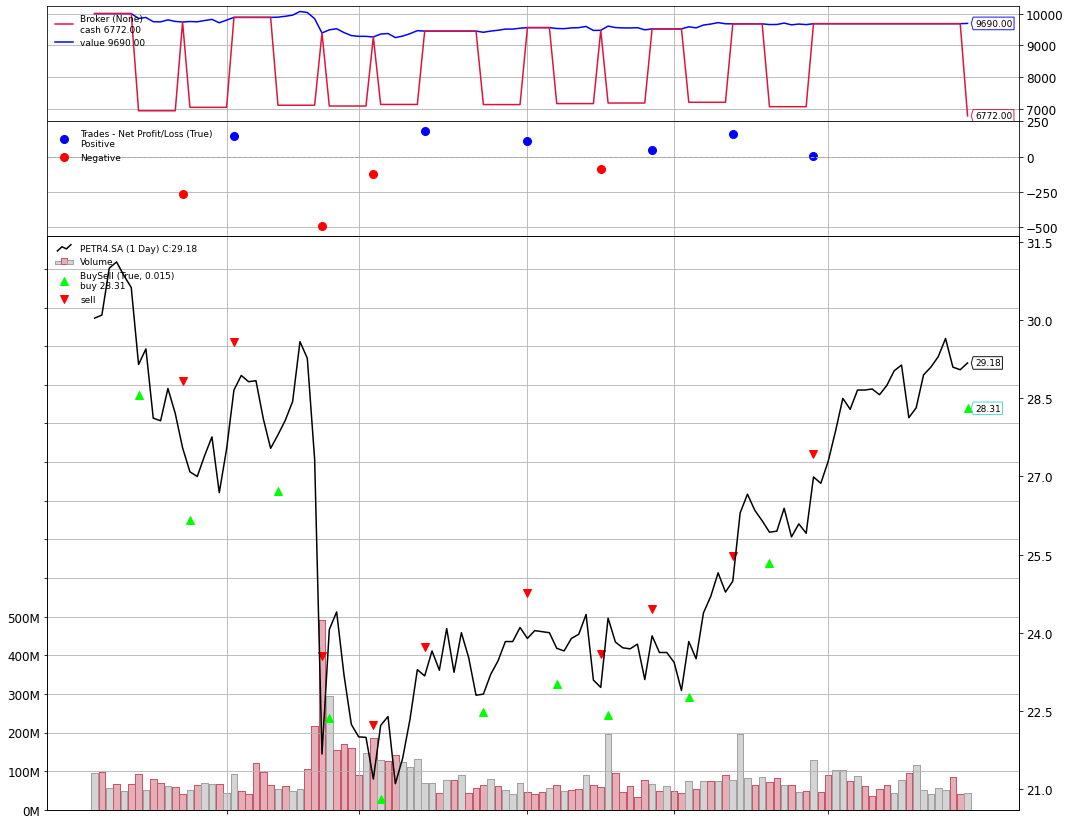

[[<Figure size 1080x864 with 4 Axes>]]

In [ ]:
plt.rcParams['figure.figsize'] = [15, 12]
plt.rcParams.update({'font.size': 12})
cerebro.plot(iplot = False)

In [ ]:
### COMISSÃO BROKER
# 0.1% ... divide by 100 to remove the %
cerebro.broker.setcommission(commission=0.001)

In [ ]:
class TestStrategy(bt.Strategy):

    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:  # Sell
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                 (trade.pnl, trade.pnlcomm))

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])

        # Check if an order is pending ... if yes, we cannot send a 2nd one
        if self.order:
            return

        # Check if we are in the market
        if not self.position:

            # Not yet ... we MIGHT BUY if ...
            if self.dataclose[0] < self.dataclose[-1]:
                    # current close less than previous close

                    if self.dataclose[-1] < self.dataclose[-2]:
                        # previous close less than the previous close

                        # BUY, BUY, BUY!!! (with default parameters)
                        self.log('BUY CREATE, %.2f' % self.dataclose[0])

                        # Keep track of the created order to avoid a 2nd order
                        self.order = self.buy()

        else:

            # Already in the market ... we might sell
            if len(self) >= (self.bar_executed + 5):
                # SELL, SELL, SELL!!! (with all possible default parameters)
                self.log('SELL CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.sell()

In [ ]:
## God Save the Queen!!! The system still made money.

Before moving on, let’s notice something by filtering the “OPERATION PROFIT” lines:

SyntaxError: ignored

In [ ]:
Adding up the “NET” profits the final figure is:


15.83
But the system said the following at the end:


2000-12-29T00:00:00, SELL CREATE, 27.41
Final Portfolio Value: 100016.98
And obviously 15.83 is not 16.98. There is no error whatsoever. The “NET” profit of 15.83 is already cash in the bag.

## 3.6. Estrutura de acesso aos dados no Backtrader (valores de cotações, indicadores e estratégias)

#### *PS: Esta parte poderá auxiliar quando estiver configurando estratégias mais complexas, que envolvam seus próprios indicadores*

A estrutura do Data Feeds é diferente de um dataframe pandas

In [ ]:
## Se rodarmos o output da erro
# data.head()

Trecho importante da documentação Backtrader [*adaptado para ser mais abrangente e aplicado ao mercado financeiro*]:

* 1) Estrutura de '*Lines' <p>
    "<u>**Data Feeds, Indicators e Strategies**</u>" são compostos por linhas.
    Uma linha é composta por 'pontos'. Em analogia a um dataframe Pandas, as linhas de um Data Feeds seriam as colunas de um df Pandas. Os 'pontos' Data Feeds seriam as células (e os 'valores' dentro delas). Ex.: datasets de cotações de ativos usualmente irão conter as linhas OHLC, cada uma por com seu respectivo número de pontos de acordo com a amplitude temporal acessada. No caso dos dados importados do YF, o Data Feed terá as linhas:
$$ Open, High, Low, Close, Volume, OpenInterest $$ <p>

    Se considerarmos ainda o 'DateTime', cada cotação de um determinado período (ex., timeframe diário) seria composto por 7 linhas.


* 2) 'Indexação por 0'<p>
    Acesso aos dados usa a mesma abordagem de indexação do python (Index 0) <p>
    Cada linha (ex., Close, que é a linha padrão, indice 0) representa uma série de dados temporais. Por sua vez, cada valor também é acessado com indexação, sendo que o 'valor atual' é indicado por [0]. Ex., para acessar o preço de fechamento '<u>naquele momento de execução da estratégia, lembrando que o dataset é acessado linha após linha durante o backtest</u>': data.linha0[0]. Para referência ao 'valor anterior', [-1].

  **Nas linhas de código abaixo há uma série de exemplos para entender a estrutura de linhas e indexação dos objetos no Backtrader**

In [ ]:
df_yf.tail()

In [ ]:
data.datafields

In [ ]:
df_yf.iloc[-1]['Close']

Reforçando a estrutura diferente do Data Feeds. Obs.: Output dá erro

In [ ]:
print(data.iloc[-1]['Close'])

In [ ]:
data.Close

In [ ]:
data.Open

In [ ]:
data.Low

In [ ]:
data.High

In [ ]:
data.Volume

In [ ]:
data.DateTime

In [ ]:
data.OpenInterest

In [ ]:
data

In [ ]:
data.line_0[0]

In [ ]:
data.array

In [ ]:
data.line4[-2]

In [ ]:
data.line5[-2]

In [ ]:
data.line6[0]

In [ ]:
pd.to_datetime(data.line6[0])

In [ ]:
data.line6[-1]

In [ ]:
segundos = int(data.line6[0])

dias = segundos // (60*60*24)
segundos_rest = segundos % (60*60*24)
horas = segundos_rest // (60*60)
segundos_rest = segundos_rest % (60*60)
minutos = segundos_rest // 60
segundos_rest = segundos_rest % 60

print(dias,"dias,",horas,"horas,",minutos,"minutos e",segundos_rest,"segundos")

In [ ]:
dias = int(data.line6[-1])

anos = dias // 365
dias_rest = dias % 365
meses = dias_rest // 30
dias_rest = dias_rest % 30

print(anos,"anos,",meses,"meses,",dias_rest,"dias")

Ainda não consegui chegar na data correta. Bora pesquisar?

In [ ]:
len(data.array)

In [ ]:
data.line6.array

In [ ]:
lista_listas = [data.line6.array,data.line3.array,data.line2.array,data.line1.array,data.line0.array,data.line4.array,data.line5.array]
lista_listas

In [ ]:
df_data_Backtrader = np.transpose(pd.DataFrame(lista_listas))
print(df_data_Backtrader.head())
print('\nEmbora o \'NOME\' da segunda coluna seja',df_data_Backtrader.columns[1],'o seu \'type()\' é',type(df_data_Backtrader.columns[1]))


In [ ]:
df_data_Backtrader = np.transpose(pd.DataFrame(lista_listas))
df_data_Backtrader = df_data_Backtrader.rename({df_data_Backtrader.columns[0]:'Date', df_data_Backtrader.columns[1]:'Open', df_data_Backtrader.columns[2]:'High', df_data_Backtrader.columns[3]:'Low',
                                                df_data_Backtrader.columns[4]:'Close', df_data_Backtrader.columns[5]:'Volume', df_data_Backtrader.columns[6]:'Open_Interest'}, axis=1)
df_data_Backtrader

In [ ]:
sma_long = ta.trend.SMAIndicator(dataframe['Close'], window=20)
sma_short = ta.trend.SMAIndicator(dataframe['Close'], window=8)
dataframe['SMA_long'] = sma_long.sma_indicator()
dataframe['SMA_short'] = sma_short.sma_indicator()
dataframe['Diff_MM_s-l'] = dataframe['SMA_short'] - dataframe['SMA_long']
dataframe

Welcome to the backtrader documentation!

The platform has 2 main objectives:

Ease of use

Go back to 1

Note

Loosely based on the Karate (Kid) rules by Mr. Miyagi.

The basics of running this platform:

Create a Strategy

Decide on potential adjustable parameters

Instantiate the Indicators you need in the Strategy

Write down the logic for entering/exiting the market

Tip

Or alternatively:

Prepare some indicators to work as long/short signals
And then

Create a Cerebro Engine

First: Inject the Strategy (or signal-based strategy)
And then:

Load and Inject a Data Feed (once created use cerebro.adddata)

And execute cerebro.run()

For visual feedback use: cerebro.plot()

The platform is highly configurable

Let’s hope you, the user, find the platform useful and fun to work with.

In [ ]:
#para fazer o matplotlib rodar

%matplotlib inline 

#Teste 2

class MMACruzamento(bt.SignalStrategy):
  def __init__(self): #cria uma função que roda imediatamente quando um objeto é criado a partir dessa classe
    sma = bt.ind.SMA(period=50) #aqui você define o indicador
    price = self.data #aqui é apontador do indicador
    crossover = bt.ind.CrossOver(price,sma) #aqui é onde você define o sinal, aqui no caso é sinal de cruzamento
    self.signal_add(bt.SIGNAL_LONG, crossover) 

cerebro = bt.Cerebro()
cerebro.addstrategy(MMACruzamento)
cerebro.adddata(data)
cerebro.run()
plt.rcParams['figure.figsize'] = [15, 12]
plt.rcParams.update({'font.size': 12}) 
cerebro.plot(iplot = False)

In [ ]:
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Candlestick(name='petr4', x=dataframe_teste.index, open=data_reduzido[('Open','ITUB4')], high = data_reduzido[('High','ITUB4')], low=data_reduzido[('Low','ITUB4')], close=data_reduzido[('Close','ITUB4')]), row=1,col=1)
fig.add_trace(go.Scatter(name='EMA_long', x=dataframe_teste.index, y=data_reduzido[('MM','EMA_long')],marker_color='blue'), row=1, col=1)
fig.add_trace(go.Scatter(name='EMA_short', x=dataframe_teste.index, y=data_reduzido[('MM','EMA_short')],marker_color='red'), row=1, col=1)
fig.add_trace(go.Scatter(name='MACD_line', x=data_reduzido.index, y=data_reduzido[('Trend_Ind','MACD_line')],marker_color='red'), row=2, col=1)
fig.add_trace(go.Scatter(name='MACD_sinal', x=data_reduzido.index, y=data_reduzido[('Trend_Ind','MACD_signal')],marker_color='blue'), row=2, col=1)
fig.add_trace(go.Bar(name='MACD_hist', x=data_reduzido.index, y=data_reduzido[('Trend_Ind','MACD_hist')],marker_color='orange'), row=2, col=1)

fig.update_layout(xaxis_rangeslider_visible=False, title_text='MACD',width=2000,height=2000)
fig.show()
Teste_crossover_TA.diff_MM.plot()

## 4. Backtesting como um verdadeiro **PROGRAMADOR RAIZ**
#### OBS: No código abaixo ainda nao cheguei lá!

# **4. Testando algumas Estratégia de Trading bem conhecidas**